# Limpeza e Tratamento de Dados: Taxa de Rotatividade

In [1]:
import pandas as pd
import seaborn as srn
import statistics as sts

In [2]:
# importando arquivo
from google.colab import files
uploaded = files.upload()

Saving Churn.csv to Churn.csv


In [3]:
# importando dados
dataset = pd.read_csv("Churn.csv", sep = ";")
# visualizar
dataset.head()

,X0,X1,X2,X3,X4,X4.1,X6,X7,X8,X9,X10,X11
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


In [4]:
# tamanho
dataset.shape

(999, 12)

In [5]:
# dando nome às colunas
dataset.columns = ["Id", "Score", "Estado", "Genero", "Idade", "Patrimonio", "Saldo", "Produtos", "TemCartCredito", "Ativo", "Salario", "Saiu"]

In [6]:
# visualizando
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0


### Explorando dados categóricos

In [8]:
# Estado
group = dataset.groupby(["Estado"]).size()
group

Estado
PR    257
RP      1
RS    478
SC    258
SP      4
TD      1
dtype: int64

<Axes: xlabel='Estado'>

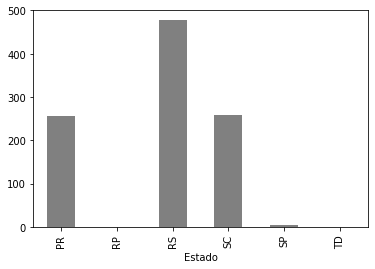

In [9]:
group.plot.bar(color = "gray")

In [10]:
# Genero
group = dataset.groupby(["Genero"]).size()
group

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

<Axes: xlabel='Genero'>

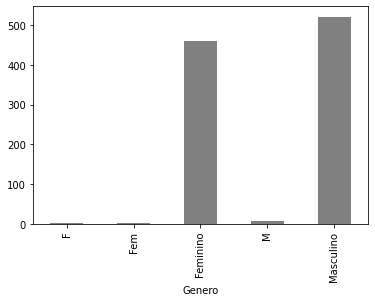

In [11]:
group.plot.bar(color = "gray")

### Explorando colunas numéricas

In [12]:
# Score
dataset["Score"].describe()

count    999.000000
mean     648.621622
std       98.264219
min      376.000000
25%      580.000000
50%      653.000000
75%      721.000000
max      850.000000
Name: Score, dtype: float64

Text(0.5, 1.0, 'Score')

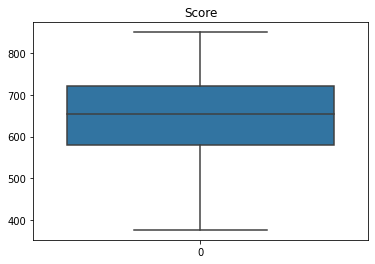

In [13]:
srn.boxplot(dataset["Score"]).set_title("Score")

Text(0.5, 1.0, 'Score')

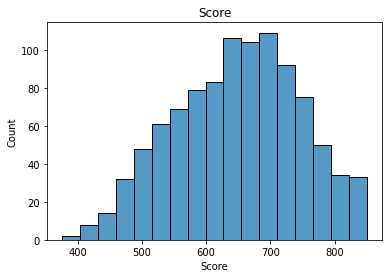

In [16]:
srn.histplot(dataset["Score"]).set_title("Score")

In [17]:
# Saldo
dataset["Saldo"].describe()

count    9.990000e+02
mean     7.164928e+06
std      6.311840e+06
min      0.000000e+00
25%      0.000000e+00
50%      8.958835e+06
75%      1.258684e+07
max      2.117743e+07
Name: Saldo, dtype: float64

Text(0.5, 1.0, 'Saldo')

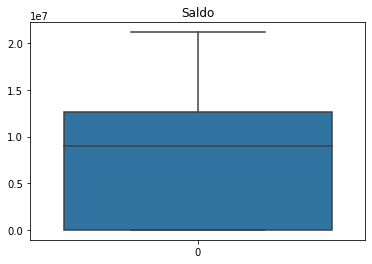

In [20]:
srn.boxplot(dataset["Saldo"]).set_title("Saldo")

Text(0.5, 1.0, 'Saldo')

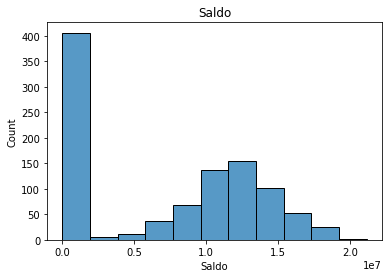

In [21]:
srn.histplot(dataset["Saldo"]).set_title("Saldo")

In [23]:
# Salário
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

Text(0.5, 1.0, 'Salario')

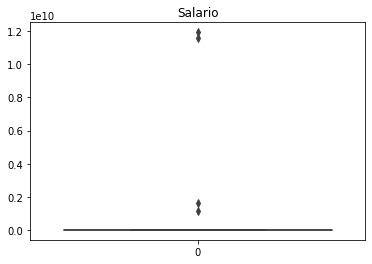

In [25]:
srn.boxplot(dataset["Salario"]).set_title("Salario")

Text(0.5, 1.0, 'Salario')

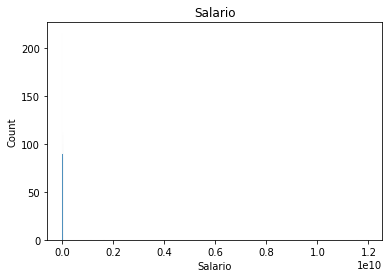

In [27]:
srn.histplot(dataset["Salario"]).set_title("Salario")

In [28]:
# Valores NaN
dataset.isnull().sum()

Id                0
Score             0
Estado            0
Genero            8
Idade             0
Patrimonio        0
Saldo             0
Produtos          0
TemCartCredito    0
Ativo             0
Salario           7
Saiu              0
dtype: int64

In [29]:
# Salario
# Remover NAs e substituir pela mediana
dataset["Salario"].describe()

count    9.920000e+02
mean     3.528762e+07
std      5.305800e+08
min      9.677000e+03
25%      3.029011e+06
50%      8.703250e+06
75%      1.405213e+07
max      1.193469e+10
Name: Salario, dtype: float64

In [30]:
mediana = sts.median(dataset["Salario"])
mediana

70518.0

In [31]:
# Substituino NA por mediana
dataset["Salario"].fillna(mediana, inplace = True)

In [32]:
# Verifica se não existem mais NAs
dataset["Salario"].isnull().sum()

0

In [33]:
# Genero, falta de padronização e NAs
group = dataset.groupby(["Genero"]).size()
group

Genero
F              2
Fem            1
Feminino     461
M              6
Masculino    521
dtype: int64

In [34]:
# Total de NAs
dataset["Genero"].isnull().sum()

8

In [35]:
# Preenche NAs com masculino (moda)
dataset["Genero"].fillna("Masculino", inplace = True)

In [36]:
# Verificando NAs
dataset["Genero"].isnull().sum()

0

In [38]:
# Padroniza de acordo com o dominio
dataset.loc[dataset["Genero"] ==  "M", "Genero"] = "Masculino"
dataset.loc[dataset["Genero"].isin( ["Fem","F"]), "Genero"] = "Feminino"
# Visualiza o resultado
group = dataset.groupby(["Genero"]).size()
group

Genero
Feminino     464
Masculino    535
dtype: int64

In [39]:
# Idades fora do domínio
dataset["Idade"].describe()

count    999.000000
mean      38.902903
std       11.401912
min      -20.000000
25%       32.000000
50%       37.000000
75%       44.000000
max      140.000000
Name: Idade, dtype: float64

In [40]:
# Visualizar
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
867,869,636,RS,Feminino,-10,1,17083346,1,1,0,11051028.0,1
984,986,773,RS,Masculino,-20,1,12453278,2,0,1,1172357.0,0
990,992,655,RS,Masculino,140,5,93147,2,1,0,6621413.0,0


In [41]:
# Calular a mediana
mediana = sts.median(dataset['Idade'])
mediana

37

In [42]:
# Substituir
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120), 'Idade'] = mediana

In [43]:
# Verificamos se ainda existem idades fora do domínio
dataset.loc[(dataset['Idade'] <  0 )  | ( dataset['Idade'] >  120) ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [44]:
# Buscamos dados duplicados pelo ID
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
80,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0
81,81,665,RS,Feminino,34,1,9664554,2,0,0,17141366.0,0


In [45]:
# Excluímos pelo ID
dataset.drop_duplicates(subset="Id", keep='first',inplace=True)
# Buscamos duplicados 
dataset[dataset.duplicated(['Id'],keep=False)]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu


In [49]:
# Estado fora do domínio
group = dataset.groupby(['Estado']).size()
group

Estado
PR    257
RS    483
SC    258
dtype: int64

In [50]:
# Atribuimos para RS (moda)
dataset.loc[dataset['Estado'].isin( ['RP','SP','TD']), 'Estado'] = "RS"
group = dataset.groupby(['Estado']).size()

In [51]:
# Verificamos o resultado
group

Estado
PR    257
RS    483
SC    258
dtype: int64

In [53]:
# Outliers em salário, vamos considerar 2 desvios padrão
desv = sts.stdev(dataset["Salario"])
desv

528988918.4679201

In [56]:
# Definir padrão como maior que 2 desvios padrão
# Checamos se atende algum critério
dataset.loc[dataset["Salario"] >=  2 * desv ]

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
7,8,376,PR,Feminino,29,4,11504674,4,1,0,1.193469e+10,1
116,118,668,PR,Feminino,37,6,1678644,1,1,0,1.156383e+10,0
170,172,484,RS,Feminino,29,4,13011439,1,1,0,1.640179e+09,0
230,232,673,RS,Masculino,72,1,0,2,0,1,1.119812e+09,0


In [57]:
# Atualiza salarios para mediana
mediana = sts.median(dataset["Salario"])
mediana

8637195.5

In [ ]:
# Atribuindo valores
dataset.loc[dataset["Salario"] >=  2 * desv, "Salario"] = median
# Checando se atende algum critério
dataset.loc[dataset["Salario"] >=  2 * desv ]

In [62]:
dataset.shape

(998, 12)

In [63]:
dataset.head()

,Id,Score,Estado,Genero,Idade,Patrimonio,Saldo,Produtos,TemCartCredito,Ativo,Salario,Saiu
0,1,619,RS,Feminino,42,2,0,1,1,1,10134888.0,1
1,2,608,SC,Feminino,41,1,8380786,1,0,1,11254258.0,0
2,3,502,RS,Feminino,42,8,1596608,3,1,0,11393157.0,1
3,4,699,RS,Feminino,39,1,0,2,0,0,9382663.0,0
4,5,850,SC,Feminino,43,2,12551082,1,1,1,790841.0,0
